In [21]:
#Import the required packages
import numpy as np
import pandas as pd
from scipy.stats import *

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

#Set the figure size
rcParams['figure.figsize'] = 10, 8

In [22]:
#Load the trend data
df = pd.read_csv('data/trends1.csv')

In [23]:
#View the first 5 rows of trend data
df.head()

,Week,Top 1,Top 2,Top 3,Date
0,0,4,14,14,2012-10-07
1,1,7,15,18,2012-10-14
2,2,5,12,15,2012-10-21
3,3,5,15,12,2012-10-28
4,4,4,12,12,2012-11-04


In [24]:
#View the last 5 rows of trend data
df.tail()

,Week,Top 1,Top 2,Top 3,Date
256,256,18,72,35,2017-09-03
257,257,17,67,37,2017-09-10
258,258,18,66,32,2017-09-17
259,259,19,62,31,2017-09-24
260,260,20,78,27,2017-10-01


In [25]:
#View the details of trend data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 5 columns):
Week     261 non-null int64
Top 1    261 non-null int64
Top 2    261 non-null int64
Top 3    261 non-null int64
Date     261 non-null object
dtypes: int64(4), object(1)
memory usage: 10.3+ KB


In [26]:
#Check whether the trend data contains any missing value
df.isnull().any()

Week     False
Top 1    False
Top 2    False
Top 3    False
Date     False
dtype: bool

In [27]:
#Overall sales summary
df.describe()

,Week,Top 1,Top 2,Top 3
count,261.00000,261.000000,261.000000,261.000000
mean,130.00000,11.796935,36.233716,23.452107
std,75.48841,8.474904,26.619017,8.180336
min,0.00000,3.000000,9.000000,10.000000
25%,65.00000,4.000000,17.000000,16.000000
50%,130.00000,6.000000,22.000000,23.000000
75%,195.00000,20.000000,55.000000,29.000000
max,260.00000,29.000000,100.000000,43.000000


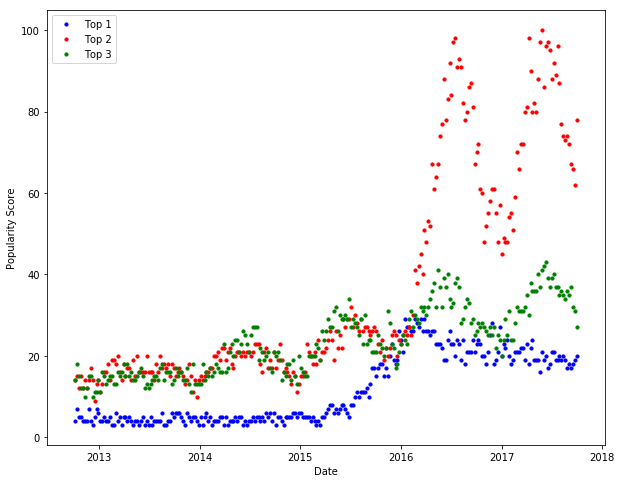

In [28]:
dates = [pd.to_datetime(d) for d in df['Date']]

plt.scatter(dates, df['Top 1'], s =10, c = 'blue')
plt.scatter(dates, df['Top 2'], s =10, c = 'red')
plt.scatter(dates, df['Top 3'], s =10, c = 'green')

plt.ylabel('Popularity Score')
plt.xlabel('Date')
plt.legend(['Top 1','Top 2','Top 3'])

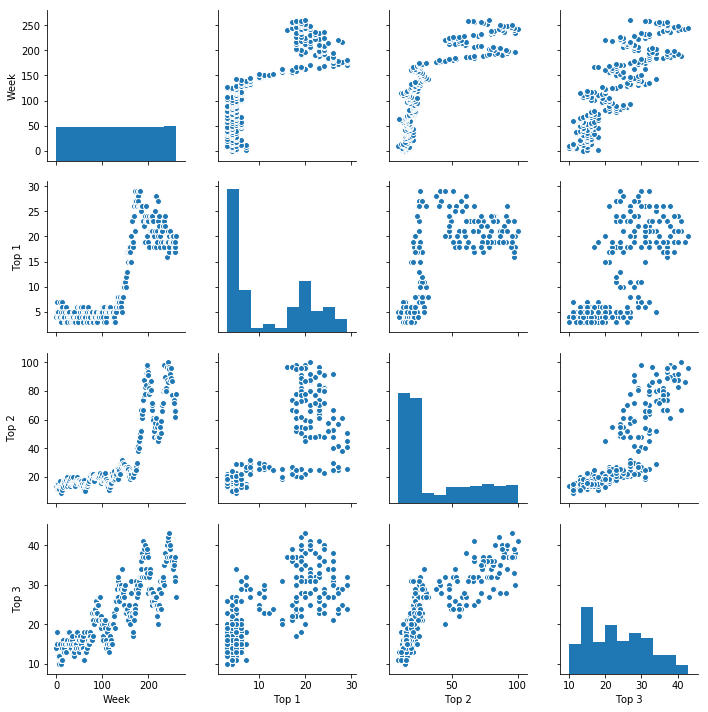

In [29]:
#Plot the trend data using Seaborn
df3 = df[['Week','Top 1', 'Top 2', 'Top 3']]
sns.pairplot(df3)

In [30]:
#Widen the output display to see more columns
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df2 = df[['Date','Top 1', 'Top 2', 'Top 3']]

#Yearly sales summary
df2.groupby(df['Date'].str[:4]).describe().reset_index().rename(columns={'Date': 'Year'})

Year Top 1                                                     Top 2                                                       Top 3                                                    
        count       mean       std   min    25%   50%   75%   max count       mean        std   min   25%   50%    75%    max count       mean       std   min   25%   50%    75%   max
0  2012  13.0   5.000000  1.354006   3.0   4.00   5.0   6.0   7.0  13.0  13.461538   1.941451   9.0  12.0  14.0  14.00   17.0  13.0  13.000000  2.380476  10.0  11.0  12.0  15.00  18.0
1  2013  52.0   4.288462  0.976921   3.0   4.00   4.0   5.0   6.0  52.0  16.096154   2.286016  10.0  15.0  16.0  18.00   20.0  52.0  14.750000  1.758732  11.0  13.0  15.0  16.00  18.0
2  2014  52.0   4.519231  0.918020   3.0   4.00   5.0   5.0   6.0  52.0  18.596154   2.958932  11.0  16.0  19.0  21.00   23.0  52.0  19.269231  3.855810  13.0  16.0  19.0  21.25  27.0
3  2015  52.0  10.326923  5.786127   3.0   5.75   8.0  15.0  26.0  52.0  23.634615   3.905897  15.0  21.0  24.0  26.00   32.0  52.0  24.230769  4.688808  15.0  21.0  24.0  28.25  34.0
4  2016  52.0  23.557692  3.201798  18.0  21.00  23.5  26.0  29.0  52.0  61.826923  21.499404  23.0  48.0  61.0  80.25   98.0  52.0  30.384615  4.935481  22.0  27.0  29.5  33.25  41.0
5  2017  40.0  19.850000  1.928863  16.0  19.00  19.5  21.0  24.0  40.0  75.850000  16.029700  45.0  66.0  77.5  88.25  100.0  40.0  33.575000  5.439115  20.0  31.0  35.0  37.00  43.0

Top 1 Model Equation : y=0.093399x+(-0.344945)
Top 2 Model Equation : y=0.292550x+(-1.797783)
Top 3 Model Equation : y=0.092055x+(11.485011)


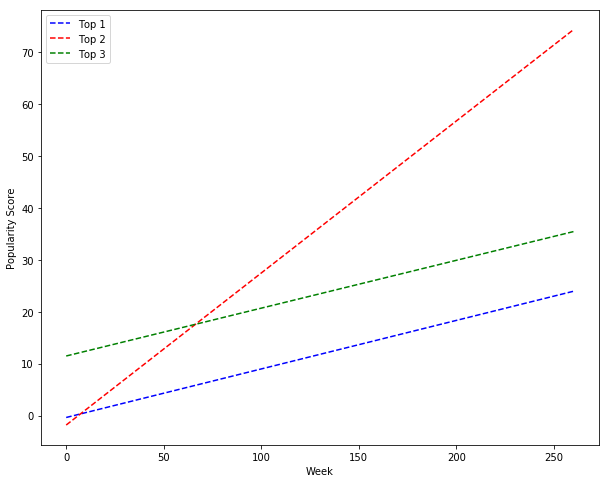

In [31]:
#Obtain the slopes and y-intercepts of the linear trendline for all three tops
z1 = np.polyfit(df['Week'], df['Top 1'], 1)
z2 = np.polyfit(df['Week'], df['Top 2'], 1)
z3 = np.polyfit(df['Week'], df['Top 3'], 1)

#Plot the linear trendline for all three tops
p1, p2, p3 = np.poly1d(z1), np.poly1d(z2), np.poly1d(z3)

plt.plot(df['Week'],p1(df['Week']),"b--")
plt.plot(df['Week'],p2(df['Week']),"r--")
plt.plot(df['Week'],p3(df['Week']),"g--")

plt.ylabel('Popularity Score')
plt.xlabel('Week')
plt.legend(['Top 1','Top 2','Top 3'])

#Print the model equations for all three tops
print "Top 1 Model Equation : y=%.6fx+(%.6f)"%(z1[0],z1[1])
print "Top 2 Model Equation : y=%.6fx+(%.6f)"%(z2[0],z2[1])
print "Top 3 Model Equation : y=%.6fx+(%.6f)"%(z3[0],z3[1])

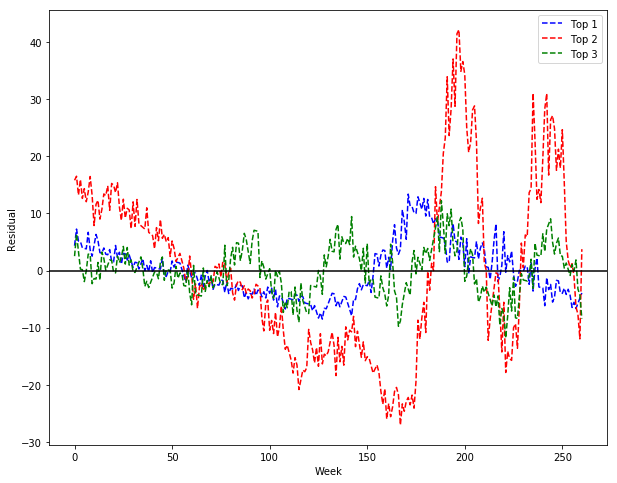

In [32]:
#Obtain the linear trendline value for all three tops
y1 = z1[0]*df['Week']+ z1[1]
y2 = z2[0]*df['Week']+ z2[1]
y3 = z3[0]*df['Week']+ z3[1]

#Calculate the residual betwen the actual value and linear trendline value
yresid1 = df['Top 1'] - y1
yresid2 = df['Top 2'] - y2
yresid3 = df['Top 3'] - y3

#Plot the residual of popularity score
plt.plot(df['Week'],yresid1,"b--")
plt.plot(df['Week'],yresid2,"r--")
plt.plot(df['Week'],yresid3,"g--")

plt.axhline(0, color='black')

plt.ylabel('Residual')
plt.xlabel('Week')
plt.legend(['Top 1','Top 2','Top 3'])

In [33]:
#Calculate the R-squared value (coefficient of determination)
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df['Week'],df['Top 1'])
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df['Week'],df['Top 2'])
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(df['Week'],df['Top 3'])

rsq1, rsq2, rsq3 = pow(r_value1,2), pow(r_value2,2), pow(r_value3,2)

#Print the R-squared value for all three tops
print "Top 1 R-sqd : %.6f"%(rsq1)
print "Top 2 R-sqd : %.6f"%(rsq2)
print "Top 3 R-sqd : %.6f"%(rsq3)

Top 1 R-sqd : 0.692112
Top 2 R-sqd : 0.688298
Top 3 R-sqd : 0.721621
